# Language detection
## Data exploration and filtering

In [1]:
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_large = pd.read_csv("data/sentences.csv", delimiter=",", encoding='utf8')
df_large.head()

,id,lan_code,sentence
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [4]:
df_large.shape

(10341812, 3)

In [5]:
with open("data/lan_to_language.json", "r") as json_file:
    lan_lang = json.load(json_file)

In [6]:
code_list = [code for code in lan_lang.keys()]  # Eventually filter by some specific languages
len(code_list)

# df = df_large[df_large['lan_code'].isin(code_list)] 

404

In [7]:
df = df_large

In [8]:
df["lan_code"].value_counts()

eng    1586621
rus     909951
ita     805104
tur     717897
epo     685643
        ...   
hax          1
rel          1
lou          1
nys          1
cyo          1
Name: lan_code, Length: 404, dtype: int64

In [9]:
df["lan_code"].describe()

count     10341812
unique         404
top            eng
freq       1586621
Name: lan_code, dtype: object

In [10]:
occurances = dict(df_large.groupby("lan_code")["id"].count())
occurances_sort = sorted(occurances.items(), key=lambda x: x[1], reverse=True)
occurances_sort

[('eng', 1586621),
 ('rus', 909951),
 ('ita', 805104),
 ('tur', 717897),
 ('epo', 685643),
 ('ber', 591222),
 ('deu', 584674),
 ('kab', 518328),
 ('fra', 501241),
 ('por', 398029),
 ('spa', 369841),
 ('hun', 357828),
 ('jpn', 220103),
 ('heb', 199203),
 ('ukr', 178269),
 ('nld', 159193),
 ('fin', 139089),
 ('pol', 116582),
 ('mkd', 77949),
 ('lit', 76149),
 ('cmn', 72439),
 ('mar', 69303),
 ('ces', 63880),
 ('dan', 54945),
 ('tok', 47203),
 ('swe', 47006),
 ('srp', 45199),
 ('lat', 41498),
 ('ara', 38650),
 ('ell', 34805),
 ('ron', 28172),
 ('ina', 27493),
 ('pes', 25662),
 ('bul', 24609),
 ('tlh', 22288),
 ('lfn', 21414),
 ('vie', 20897),
 ('nds', 17988),
 ('tgl', 17910),
 ('slk', 16882),
 ('jbo', 16205),
 ('ind', 15717),
 ('hin', 14573),
 ('nob', 14326),
 ('tat', 13766),
 ('bel', 12654),
 ('isl', 12460),
 ('ckb', 10650),
 ('ido', 9686),
 ('kmr', 9654),
 ('yid', 9603),
 ('kor', 8981),
 ('cat', 8072),
 ('uig', 7813),
 ('ile', 7650),
 ('bre', 7289),
 ('tuk', 6755),
 ('zsm', 6610),
 ('yu

In [11]:
language_sentences_count_threshold = 10000

df_20 = df_large[df_large.apply(lambda x: occurances[x["lan_code"]] > language_sentences_count_threshold, axis=1)]

In [12]:
df_20.to_csv("data/sentences_10k.csv", sep=',', encoding='utf-8')

In [13]:
df_20

,id,lan_code,sentence
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！
...,...,...,...
10341807,10794524,spa,Quiero este libro por favor.
10341808,10794525,spa,Los han hecho huir.
10341809,10794526,spa,Los botaron.
10341810,10794527,spa,Los hicieron correr.


In [14]:
df_20["lan_code"].value_counts()

eng    1586621
rus     909951
ita     805104
tur     717897
epo     685643
ber     591222
deu     584674
kab     518328
fra     501241
por     398029
spa     369841
hun     357828
jpn     220103
heb     199203
ukr     178269
nld     159193
fin     139089
pol     116582
mkd      77949
lit      76149
cmn      72439
mar      69303
ces      63880
dan      54945
tok      47203
swe      47006
srp      45199
lat      41498
ara      38650
ell      34805
ron      28172
ina      27493
pes      25662
bul      24609
tlh      22288
lfn      21414
vie      20897
nds      17988
tgl      17910
slk      16882
jbo      16205
ind      15717
hin      14573
nob      14326
tat      13766
bel      12654
isl      12460
ckb      10650
Name: lan_code, dtype: int64

In [15]:
df_20["lan_code"].describe()

count     10041510
unique          48
top            eng
freq       1586621
Name: lan_code, dtype: object

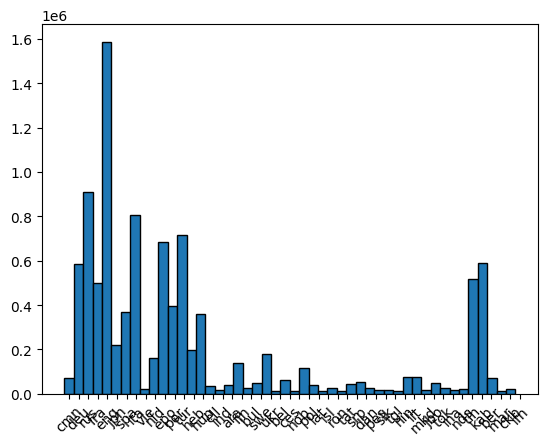

In [16]:
plt.hist(df_20["lan_code"], bins=len(df_20["lan_code"].unique()), edgecolor='black', align='left')
plt.xticks(rotation=45)
plt.show()

In [21]:
language_sentences_number_threshold = 50000

df_20_balanced = df_20[df_20.apply(lambda x: (language_sentences_number_threshold/occurances[x["lan_code"]]) > random.random(), axis=1)]

In [22]:
df_20_balanced["lan_code"].value_counts()

por    50436
ber    50310
heb    50283
hun    50277
eng    50219
jpn    50131
mkd    50117
ita    50115
deu    50112
rus    50090
mar    50089
ukr    50072
kab    49992
lit    49989
dan    49987
tur    49972
ces    49945
fin    49888
spa    49834
epo    49821
nld    49819
cmn    49799
fra    49764
pol    49714
tok    47203
swe    47006
srp    45199
lat    41498
ara    38650
ell    34805
ron    28172
ina    27493
pes    25662
bul    24609
tlh    22288
lfn    21414
vie    20897
nds    17988
tgl    17910
slk    16882
jbo    16205
ind    15717
hin    14573
nob    14326
tat    13766
bel    12654
isl    12460
ckb    10650
Name: lan_code, dtype: int64

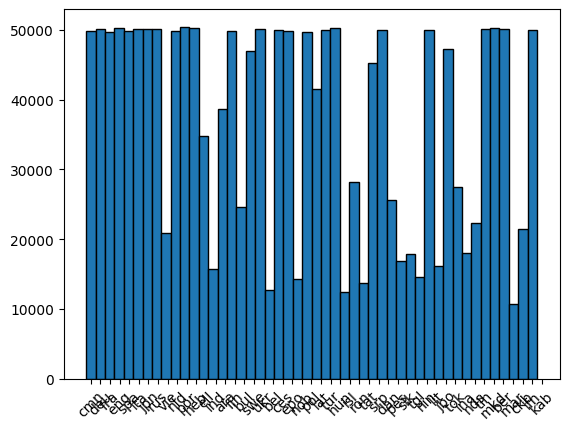

In [23]:
plt.hist(df_20_balanced["lan_code"], bins=len(df_20_balanced["lan_code"].unique()), edgecolor='black', align='left')
plt.xticks(rotation=45)
plt.show()

In [24]:
df_20_balanced.to_csv("data/sentences_10k_balanced.csv", sep=',', encoding='utf-8')